In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
DEFAULT_BRANCHES = [
    "VarQual",
    "RepeatMask",
    "ForRevAltRead",
    "Ploidy",
    "ReadDepth",
    "master",
    "MapQual",
    "AltProportion",
    "SNPwindow",
    "BaseQual"
]

## F-scores by dataset

In [4]:
f_scores_aph = pd.DataFrame()
f_scores_zwyer = pd.DataFrame()
f_scores_rand = pd.DataFrame()
for branch in DEFAULT_BRANCHES:
    stats = pd.read_csv("/mnt/fsx-027/ofat-all/{}/stats.csv".format(branch))
    stats = stats.drop("Unnamed: 0", axis=1)
    stats = stats.set_index("name")
    f_scores_aph[branch] = stats["f_score"][pd.Series(stats.index).str.contains("VcfSample-AF-*").values]
    f_scores_zwyer[branch] = stats["f_score"][[not name for name in pd.Series(stats.index).str.contains("VcfSample-AF-*|RandomSample*").values]]
    f_scores_rand[branch] = stats["f_score"][pd.Series(stats.index).str.contains("RandomSample-snps16000*").values]

In [5]:
f_scores_aph.head()

,VarQual,RepeatMask,ForRevAltRead,Ploidy,ReadDepth,master,MapQual,AltProportion,SNPwindow,BaseQual
name,,,,,,,,,,
VcfSample-AF-12-00090-18-seed1-error0.001-0.01-readpairs-289994,0.975741,0.956044,0.975741,0.975741,0.975741,0.972973,0.975741,0.972973,0.964578,0.975741
VcfSample-AF-12-00295-18-seed2-error0.001-0.01-readpairs-289994,0.971787,0.942308,0.971787,0.968750,0.974843,0.971787,0.968750,0.968750,0.955696,0.968750
VcfSample-AF-12-00305-16-seed3-error0.001-0.01-readpairs-289994,1.000000,0.965517,1.000000,1.000000,1.000000,0.996656,1.000000,0.996656,0.983051,1.000000
VcfSample-AF-12-00320-18-seed4-error0.001-0.01-readpairs-289994,1.000000,0.989967,0.996678,1.000000,0.996678,1.000000,0.996678,1.000000,0.996678,0.996678
VcfSample-AF-12-00362-18-seed5-error0.001-0.01-readpairs-289994,0.970350,0.944751,0.970350,0.970350,0.970350,0.967568,0.970350,0.970350,0.961749,0.970350


In [6]:
f_scores_zwyer.head()

,VarQual,RepeatMask,ForRevAltRead,Ploidy,ReadDepth,master,MapQual,AltProportion,SNPwindow,BaseQual
name,,,,,,,,,,
VcfSample-ERR2212113-seed93-error0.001-0.01-readpairs-289994,1.000000,0.973664,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.977511,1.000000
VcfSample-ERR2212114-seed94-error0.001-0.01-readpairs-289994,0.998534,0.972326,0.995620,0.998536,0.994879,0.997799,0.995620,0.998536,0.976155,0.995620
VcfSample-ERR229952-seed95-error0.001-0.01-readpairs-289994,0.993780,0.979706,0.992398,0.993780,0.993094,0.993084,0.993094,0.993084,0.976842,0.993094
VcfSample-ERR2517425-seed96-error0.001-0.01-readpairs-289994,0.992733,0.968981,0.989138,0.992733,0.989855,0.992000,0.989138,0.992000,0.972694,0.989855
VcfSample-ERR2659159-seed97-error0.001-0.01-readpairs-289994,0.985423,0.972774,0.983248,0.984705,0.984683,0.985423,0.984705,0.985423,0.972018,0.984705


In [7]:
f_scores_rand.head()

,VarQual,RepeatMask,ForRevAltRead,Ploidy,ReadDepth,master,MapQual,AltProportion,SNPwindow,BaseQual
name,,,,,,,,,,
RandomSample-snps16000-indels3898-seed1,0.997244,0.990609,0.997433,0.997653,0.997652,0.995230,0.997433,0.995452,0.983008,0.997622
RandomSample-snps16000-indels3898-seed666,0.997715,0.990701,0.997558,0.997935,0.997777,0.995734,0.997935,0.996238,0.982777,0.997935


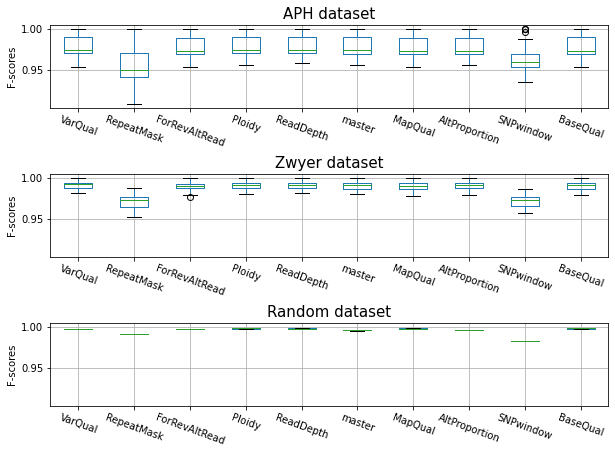

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(10,7), sharey=True) 
f_scores_aph.boxplot(ax=axs[0])
axs[0].set_ylabel("F-scores")
axs[0].set_title("APH dataset", size=15)
axs[0].set_xticks(range(1,len(DEFAULT_BRANCHES)+1), DEFAULT_BRANCHES, rotation=-20)
f_scores_zwyer.boxplot(ax=axs[1])
axs[1].set_ylabel("F-scores");
axs[1].set_title("Zwyer dataset", size=15)
axs[1].set_xticks(range(1,len(DEFAULT_BRANCHES)+1), DEFAULT_BRANCHES, rotation=-20)
f_scores_rand.boxplot(ax=axs[2])
axs[2].set_ylabel("F-scores");
axs[2].set_title("Random dataset", size=15)
axs[2].set_xticks(range(1,len(DEFAULT_BRANCHES)+1), DEFAULT_BRANCHES, rotation=-20)
plt.subplots_adjust(hspace=0.8)

* The average divergence (crude estimate: the mean number of variants) in each dataset is **289**, **710** and **1989** for the **APH**, **zwyer** and **random** sets respectively.
* Performance is best on the random set, but we're expecting this and shouldn't but too much weight on it, since these aren't biologically plausible simulations.
* Interestingly, performance seems to be better for the zwyer set, despite higher divergence.

## FPs vs. FNs

Going to ignore the samples with randomly introduced SNPs for the remainder of this analysis 

In [103]:
fp = []
fn = []
for branch in DEFAULT_BRANCHES:
    stats = pd.read_csv("/mnt/fsx-027/ofat-all/{}/stats.csv".format(branch))
    stats = stats.drop("Unnamed: 0", axis=1)
    stats = stats.set_index("name")
    fp.append(stats["FP"][[not name for name in pd.Series(stats.index).str.contains("RandomSample*").values]].sum())
    fn.append(stats["FN"][[not name for name in pd.Series(stats.index).str.contains("RandomSample*").values]].sum())
    
errors = pd.DataFrame(index = DEFAULT_BRANCHES)
    
errors["FP"] = fp
errors["FN"] = fn
errors["error_ratio"] = errors.apply(lambda x: x.FP/x.FN, axis=1)

In [104]:
errors

,FP,FN,error_ratio
VarQual,118,805,0.146584
RepeatMask,235,2173,0.108145
ForRevAltRead,225,807,0.278810
Ploidy,177,789,0.224335
ReadDepth,144,822,0.175182
master,94,879,0.106940
MapQual,255,796,0.320352
AltProportion,165,829,0.199035
SNPwindow,218,2176,0.100184
BaseQual,245,789,0.310520


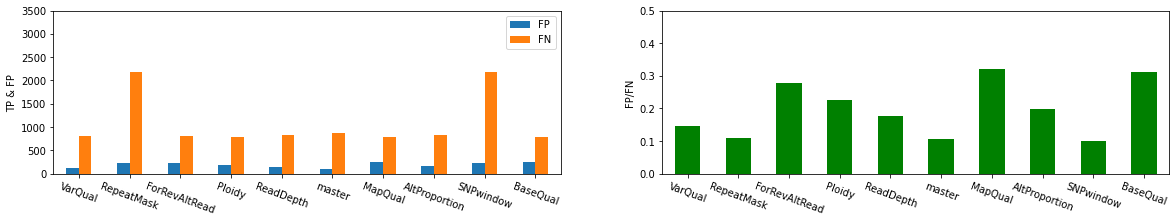

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(20,3)) 
errors[["FP", "FN"]].plot.bar(ax=axs[0])
axs[0].set_ylim((0,3500))
axs[0].set_ylabel("TP & FP")
axs[0].set_xticks(range(0,len(DEFAULT_BRANCHES)), DEFAULT_BRANCHES, rotation=-20)
errors["error_ratio"].plot.bar(ax=axs[1], color='g')
axs[1].set_ylim((0,0.5))
axs[1].set_ylabel("FP/FN")
axs[1].set_xticks(range(0,len(DEFAULT_BRANCHES)), DEFAULT_BRANCHES, rotation=-20);

* **SNPwindow and RepeatMask were the poorly performing branches**. They just have loads of FN, i guess because of more filtering. RepeatMask has a larger mask file? and SNPwindow has excludes SNPs within a certain distance of other SNPs
* We have way more FNs than FPs in all cases. F-score weights FNs and Fps equally so the majority of our F-score performance is due to FNs
* There's **not** an insignificant difference in ratios between the different branches, so I think it's worth considering the different sources of FP/FN in the different branches, e.g. **ForRevAltRead**, **MapQual** and **BaseQual** presumably have fewer FNs than the other branches but also more FPs, whereas, **master** looks like it may have the fewest FPs (ignoring SNPwindow, and RepeatMask.

* The purpose of filtering is to avoid too many FP, right? we don't want to call a SNP if we're not confident about it. 
* Obviously as the degree of filtering icnreases the number of FN will go up.
* It's looking to me, as though we might be able to get away with less filtering, as the majority of impact on F-score seems to be coming from FNs..